# Model evaluation
---

In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

def plot_history (filename, epochs):
    history = pd.read_csv (filename)
    history.rename (columns={'Unnamed: 0': 'epoch'}, inplace=True)
    
    fig, axs = plt.subplots (1,2)
    
    axs[0].plot (history['epoch'][:epochs], history['fbeta'][:epochs])
    axs[0].plot (history['epoch'][:epochs], history['val_fbeta'][:epochs])
    axs[0].legend ()
    
    axs[1].plot (history['epoch'][:epochs], history['loss'][:epochs])
    axs[1].plot (history['epoch'][:epochs], history['val_loss'][:epochs])
    axs[1].legend ()
    
    fig.set_size_inches ((15, 6))
    plt.show ()
    
    return history

def running_mean (x, N):
    cumsum = np.cumsum (np.insert (x, 0, 0)) 
    return (cumsum[N:] - cumsum[:-N]) / N

## last model
is reference for further work

- no image standardization

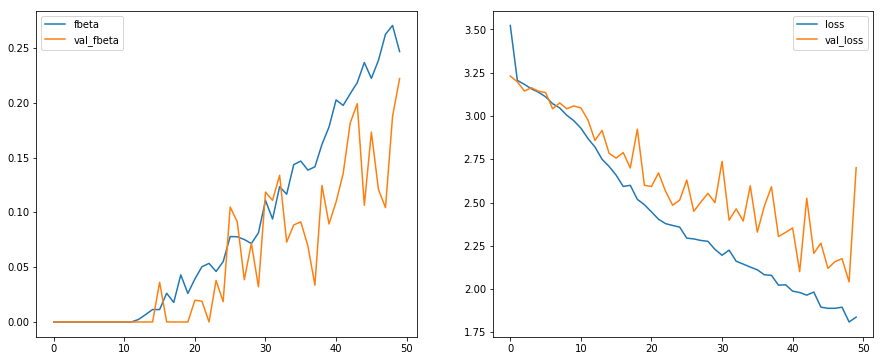

In [3]:
history = plot_history ('20180906-140724_model.hist.csv', 50)

In [4]:
history.head ()

,epoch,fbeta,loss,val_fbeta,val_loss
0,0,9.878489e-09,3.523146,1.041667e-08,3.231035
1,1,1.000000e-08,3.205881,1.041667e-08,3.197504
2,2,1.000000e-08,3.182902,1.041667e-08,3.144299
3,3,1.000000e-08,3.156921,1.041667e-08,3.163419
4,4,1.000000e-08,3.137524,1.041667e-08,3.143163


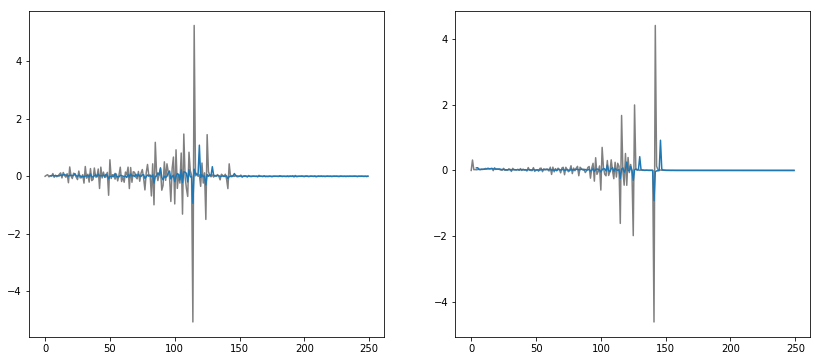

In [5]:
diff_val_loss = (history['val_loss'].shift () - history['val_loss']).fillna (0)
diff_val_loss = pd.DataFrame (history['epoch']).join (diff_val_loss)

diff_loss = (history['loss'].shift () - history['loss']).fillna (0)
diff_loss = pd.DataFrame (history['epoch']).join (diff_loss)

fig, axs = plt.subplots (1,2)
axs[0].plot (diff_val_loss['epoch'], diff_val_loss['val_loss'], color='grey')
smoothed_val_loss = running_mean (diff_val_loss['val_loss'].values, 5)
axs[0].plot (diff_val_loss['epoch'][-len(smoothed_val_loss):], smoothed_val_loss)

axs[1].plot (diff_loss['epoch'], diff_loss['loss'], color='grey')
smoothed_loss = running_mean (diff_loss['loss'].values, 5)
axs[1].plot (diff_loss['epoch'][-len(smoothed_loss):], smoothed_loss)

fig.set_size_inches ((14, 6))
plt.show ()

In [6]:
diff_val_loss.describe ()
#diff_loss.describe ()

,epoch,val_loss
count,250.000000,250.000000
mean,124.500000,0.011478
std,72.312977,0.547732
min,0.000000,-5.066177
25%,62.250000,-0.017880
50%,124.500000,0.001820
75%,186.750000,0.045754
max,249.000000,5.243836


## model

In [7]:
with open ('20180906-151918_model.param.txt','r') as f:
    output = f.read ()
    print (output)

{'loss': "<class 'function'>", 'mom': 0.0, 'seed': 42, 'use_img_std': True, 'lr': 0.01, 'opt': "<class 'keras.optimizers.SGD'>"}


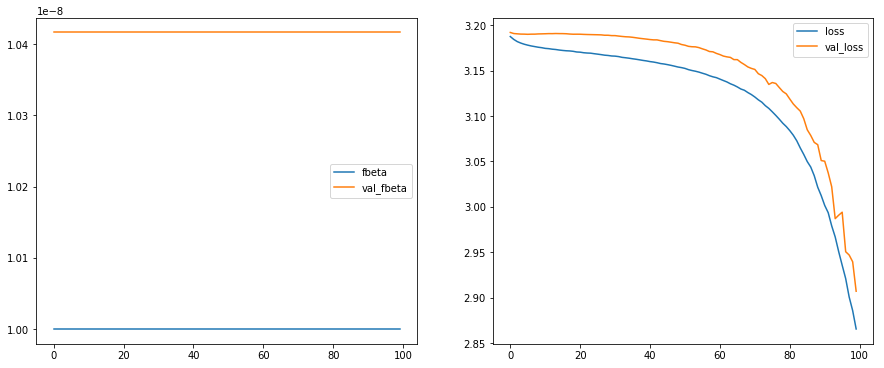

In [7]:
history = plot_history ('20180906-151918_model.hist.csv', 100)

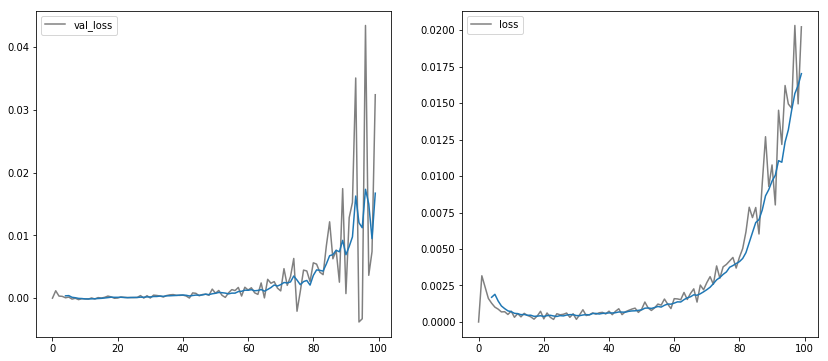

In [9]:
diff_val_loss = (history['val_loss'].shift () - history['val_loss']).fillna (0)
diff_val_loss = pd.DataFrame (history['epoch']).join (diff_val_loss)

diff_loss = (history['loss'].shift () - history['loss']).fillna (0)
diff_loss = pd.DataFrame (history['epoch']).join (diff_loss)

fig, axs = plt.subplots (1,2)
axs[0].plot (diff_val_loss['epoch'], diff_val_loss['val_loss'], color='grey')
smoothed_val_loss = running_mean (diff_val_loss['val_loss'].values, 5)
axs[0].plot (diff_val_loss['epoch'][-len(smoothed_val_loss):], smoothed_val_loss)
axs[0].legend ()

axs[1].plot (diff_loss['epoch'], diff_loss['loss'], color='grey')
smoothed_loss = running_mean (diff_loss['loss'].values, 5)
axs[1].plot (diff_loss['epoch'][-len(smoothed_loss):], smoothed_loss)
axs[1].legend ()

fig.set_size_inches ((14, 6))
plt.show ()

In [10]:
with open ('20180906-155602_model.param.txt','r') as f:
    output = f.read ()
    print (output)

{'batch_size': 64, 'loss': "<class 'function'>", 'val_split': 0.10256410256410256, 'mom': 0.0, 'seed': 42, 'use_img_std': True, 'lr': 0.1, 'epochs': 50, 'opt': "<class 'keras.optimizers.SGD'>"}


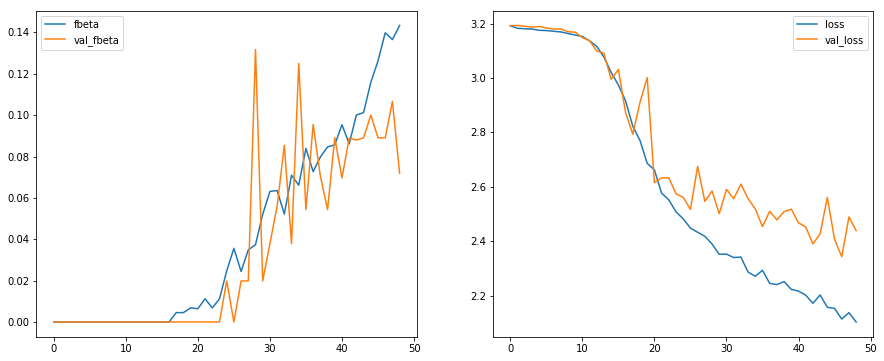

In [6]:
history = plot_history ('20180906-155602_model.hist.csv', -1)

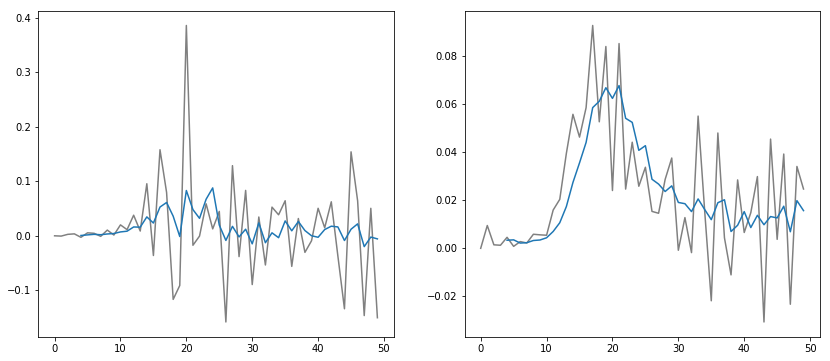

In [12]:
diff_val_loss = (history['val_loss'].shift () - history['val_loss']).fillna (0)
diff_val_loss = pd.DataFrame (history['epoch']).join (diff_val_loss)

diff_loss = (history['loss'].shift () - history['loss']).fillna (0)
diff_loss = pd.DataFrame (history['epoch']).join (diff_loss)

fig, axs = plt.subplots (1,2)
axs[0].plot (diff_val_loss['epoch'], diff_val_loss['val_loss'], color='grey')
smoothed_val_loss = running_mean (diff_val_loss['val_loss'].values, 5)
axs[0].plot (diff_val_loss['epoch'][-len(smoothed_val_loss):], smoothed_val_loss)

axs[1].plot (diff_loss['epoch'], diff_loss['loss'], color='grey')
smoothed_loss = running_mean (diff_loss['loss'].values, 5)
axs[1].plot (diff_loss['epoch'][-len(smoothed_loss):], smoothed_loss)

fig.set_size_inches ((14, 6))
plt.show ()

In [13]:
with open ('20180906-163025_model.param.txt','r') as f:
    output = f.read ()
    print (output)

{'batch_size': 40, 'loss': "<class 'function'>", 'val_split': 0.10256410256410256, 'mom': 0.0, 'seed': 42, 'use_img_std': True, 'lr': 0.1, 'epochs': 50, 'opt': "<class 'keras.optimizers.SGD'>"}


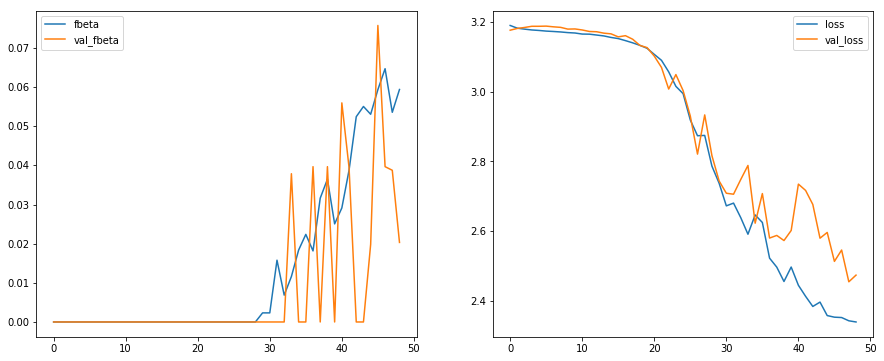

In [14]:
history = plot_history ('20180906-163025_model.hist.csv', -1)

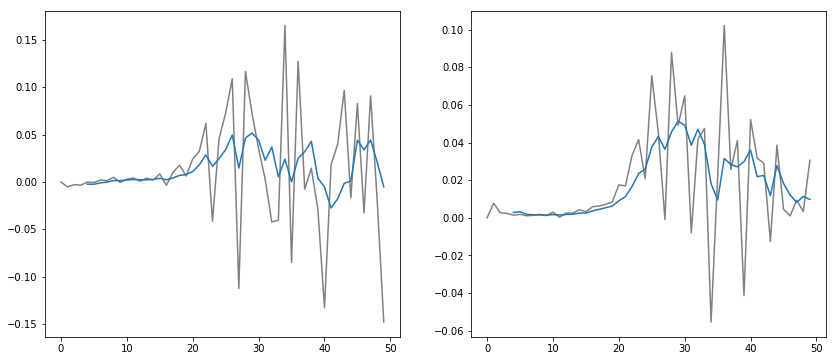

In [15]:
diff_val_loss = (history['val_loss'].shift () - history['val_loss']).fillna (0)
diff_val_loss = pd.DataFrame (history['epoch']).join (diff_val_loss)

diff_loss = (history['loss'].shift () - history['loss']).fillna (0)
diff_loss = pd.DataFrame (history['epoch']).join (diff_loss)

fig, axs = plt.subplots (1,2)
axs[0].plot (diff_val_loss['epoch'], diff_val_loss['val_loss'], color='grey')
smoothed_val_loss = running_mean (diff_val_loss['val_loss'].values, 5)
axs[0].plot (diff_val_loss['epoch'][-len(smoothed_val_loss):], smoothed_val_loss)

axs[1].plot (diff_loss['epoch'], diff_loss['loss'], color='grey')
smoothed_loss = running_mean (diff_loss['loss'].values, 5)
axs[1].plot (diff_loss['epoch'][-len(smoothed_loss):], smoothed_loss)

fig.set_size_inches ((14, 6))
plt.show ()

In [16]:
with open ('20180906-170156_model.param.txt','r') as f:
    output = f.read ()
    print (output)

{'batch_size': 40, 'loss': "<class 'function'>", 'val_split': 0.20512820512820512, 'mom': 0.0, 'seed': 42, 'use_img_std': True, 'lr': 0.1, 'epochs': 50, 'opt': "<class 'keras.optimizers.SGD'>"}


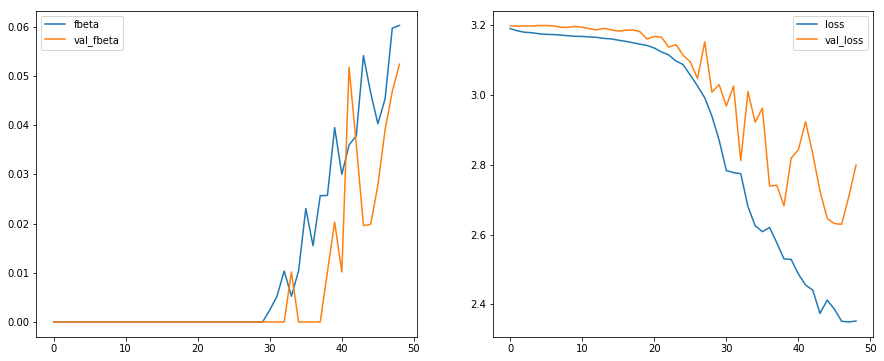

In [17]:
history = plot_history ('20180906-170156_model.hist.csv', -1)

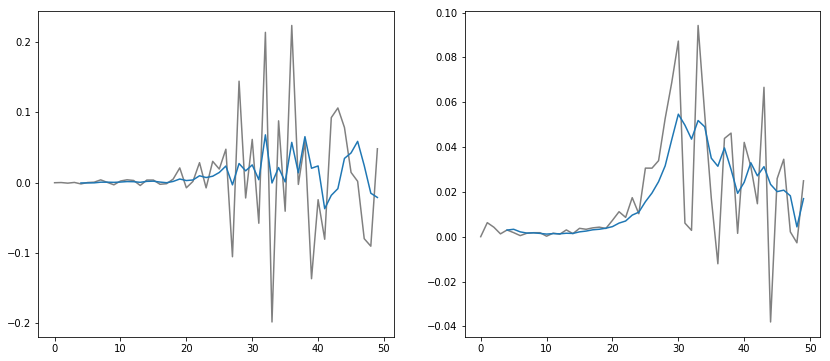

In [18]:
diff_val_loss = (history['val_loss'].shift () - history['val_loss']).fillna (0)
diff_val_loss = pd.DataFrame (history['epoch']).join (diff_val_loss)

diff_loss = (history['loss'].shift () - history['loss']).fillna (0)
diff_loss = pd.DataFrame (history['epoch']).join (diff_loss)

fig, axs = plt.subplots (1,2)
axs[0].plot (diff_val_loss['epoch'], diff_val_loss['val_loss'], color='grey')
smoothed_val_loss = running_mean (diff_val_loss['val_loss'].values, 5)
axs[0].plot (diff_val_loss['epoch'][-len(smoothed_val_loss):], smoothed_val_loss)

axs[1].plot (diff_loss['epoch'], diff_loss['loss'], color='grey')
smoothed_loss = running_mean (diff_loss['loss'].values, 5)
axs[1].plot (diff_loss['epoch'][-len(smoothed_loss):], smoothed_loss)

fig.set_size_inches ((14, 6))
plt.show ()

In [19]:
with open ('20180906-173423_model.param.txt','r') as f:
    output = f.read ()
    print (output)

{'batch_size': 62, 'loss': "<class 'function'>", 'val_split': 0.20512820512820512, 'mom': 0.0, 'seed': 42, 'use_img_std': True, 'lr': 0.1, 'epochs': 50, 'opt': "<class 'keras.optimizers.SGD'>"}


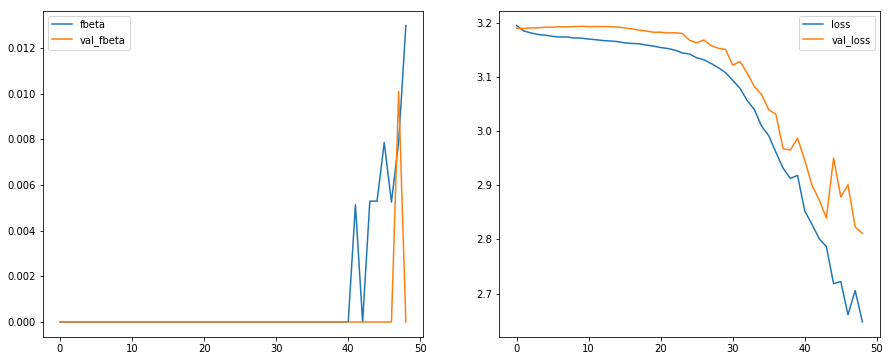

In [20]:
history = plot_history ('20180906-173423_model.hist.csv', -1)

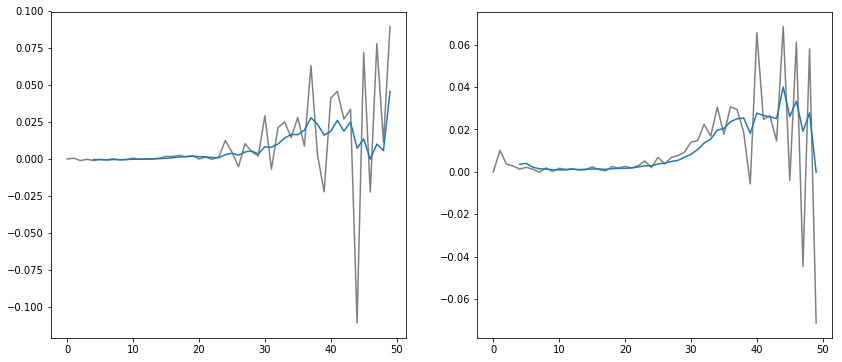

In [21]:
diff_val_loss = (history['val_loss'].shift () - history['val_loss']).fillna (0)
diff_val_loss = pd.DataFrame (history['epoch']).join (diff_val_loss)

diff_loss = (history['loss'].shift () - history['loss']).fillna (0)
diff_loss = pd.DataFrame (history['epoch']).join (diff_loss)

fig, axs = plt.subplots (1,2)
axs[0].plot (diff_val_loss['epoch'], diff_val_loss['val_loss'], color='grey')
smoothed_val_loss = running_mean (diff_val_loss['val_loss'].values, 5)
axs[0].plot (diff_val_loss['epoch'][-len(smoothed_val_loss):], smoothed_val_loss)

axs[1].plot (diff_loss['epoch'], diff_loss['loss'], color='grey')
smoothed_loss = running_mean (diff_loss['loss'].values, 5)
axs[1].plot (diff_loss['epoch'][-len(smoothed_loss):], smoothed_loss)

fig.set_size_inches ((14, 6))
plt.show ()

In [ ]:
# mehr Daten frür Lernen -> val_split = 6/39 (~15 %) -> 792 training samples -> batch_size = 44

In [22]:
with open ('20180907-073030_model.param.txt','r') as f:
    output = f.read ()
    print (output)

{'seed': 42, 'mom': 0.3, 'val_split': 0.15384615384615385, 'epochs': 450, 'use_img_std': True, 'lr': 0.1, 'opt': "<class 'keras.optimizers.SGD'>", 'batch_size': 44, 'loss': "<class 'function'>"}


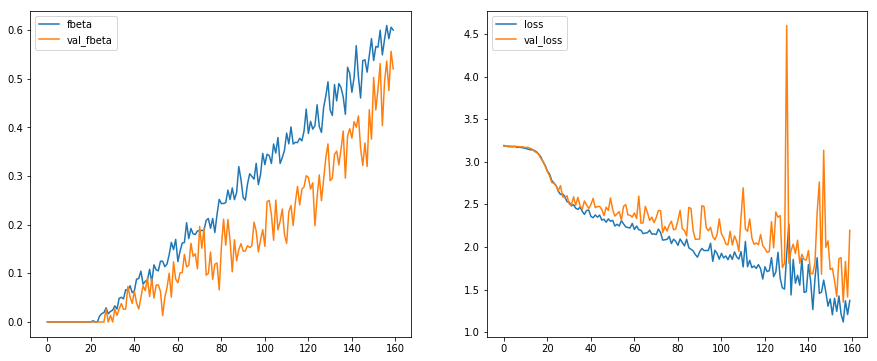

In [28]:
history = plot_history ('20180907-073030_model.hist.csv', 160)

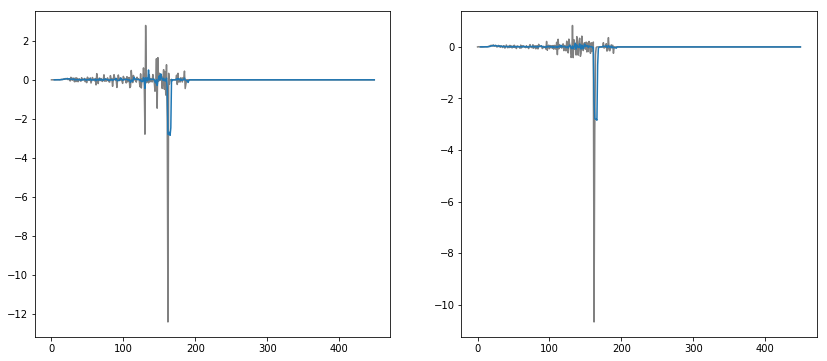

In [29]:
diff_val_loss = (history['val_loss'].shift () - history['val_loss']).fillna (0)
diff_val_loss = pd.DataFrame (history['epoch']).join (diff_val_loss)

diff_loss = (history['loss'].shift () - history['loss']).fillna (0)
diff_loss = pd.DataFrame (history['epoch']).join (diff_loss)

fig, axs = plt.subplots (1,2)
axs[0].plot (diff_val_loss['epoch'], diff_val_loss['val_loss'], color='grey')
smoothed_val_loss = running_mean (diff_val_loss['val_loss'].values, 5)
axs[0].plot (diff_val_loss['epoch'][-len(smoothed_val_loss):], smoothed_val_loss)

axs[1].plot (diff_loss['epoch'], diff_loss['loss'], color='grey')
smoothed_loss = running_mean (diff_loss['loss'].values, 5)
axs[1].plot (diff_loss['epoch'][-len(smoothed_loss):], smoothed_loss)

fig.set_size_inches ((14, 6))
plt.show ()

In [2]:
# load model architecture
import os
from keras import models

load_name = os.path.join ('20180907-073030_model.arch.yaml')
print ('>>> loading and compiling model...', end=' ', flush=True)
with open (load_name, 'r') as yaml_file:
    yaml_string = yaml_file.read ()
model = models.model_from_yaml (yaml_string)
#model.compile (optimizer=opt_sgd, loss=loss, metrics=[fbeta])
print ('done')

# load best weights
print ('>>> loading best weights into model...', end=' ', flush=True)
model.load_weights (os.path.join ('20180907-073030_model.weights.b.h5'))
print ('done')

model.summary ()

>>> loading and compiling model... done
>>> loading best weights into model... done
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           (None, 160, 160, 1)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 160, 160, 64)      320       
_________________________________________________________________
maxp_1 (MaxPooling2D)        (None, 80, 80, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 80, 80, 128)       32896     
_________________________________________________________________
maxp_2 (MaxPooling2D)        (None, 40, 40, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 40, 40, 256)       131328    
__________________________________________________________